In [1]:
import tensorflow as tf
import os
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from PCEDNet import PCEDNet, generate_input
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gpus =tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")

Running on GPU


In [3]:
BATCH_SIZE = 16384
EPOCH = 50
ABC2 = os.path.join("..", "..", "ABC2", "ABC_ssm")
DATA_PATH = os.path.join(ABC2, "Train")
VALIDATION_PATH = os.path.join(ABC2, "Validation")
TEST_PATH = os.path.join(ABC2, "Test")
MODEL_PATH = os.path.join("Model", "PCEDNET")

# Load Data

In [4]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

# Build the model 

In [5]:
model = PCEDNet().build()

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                              

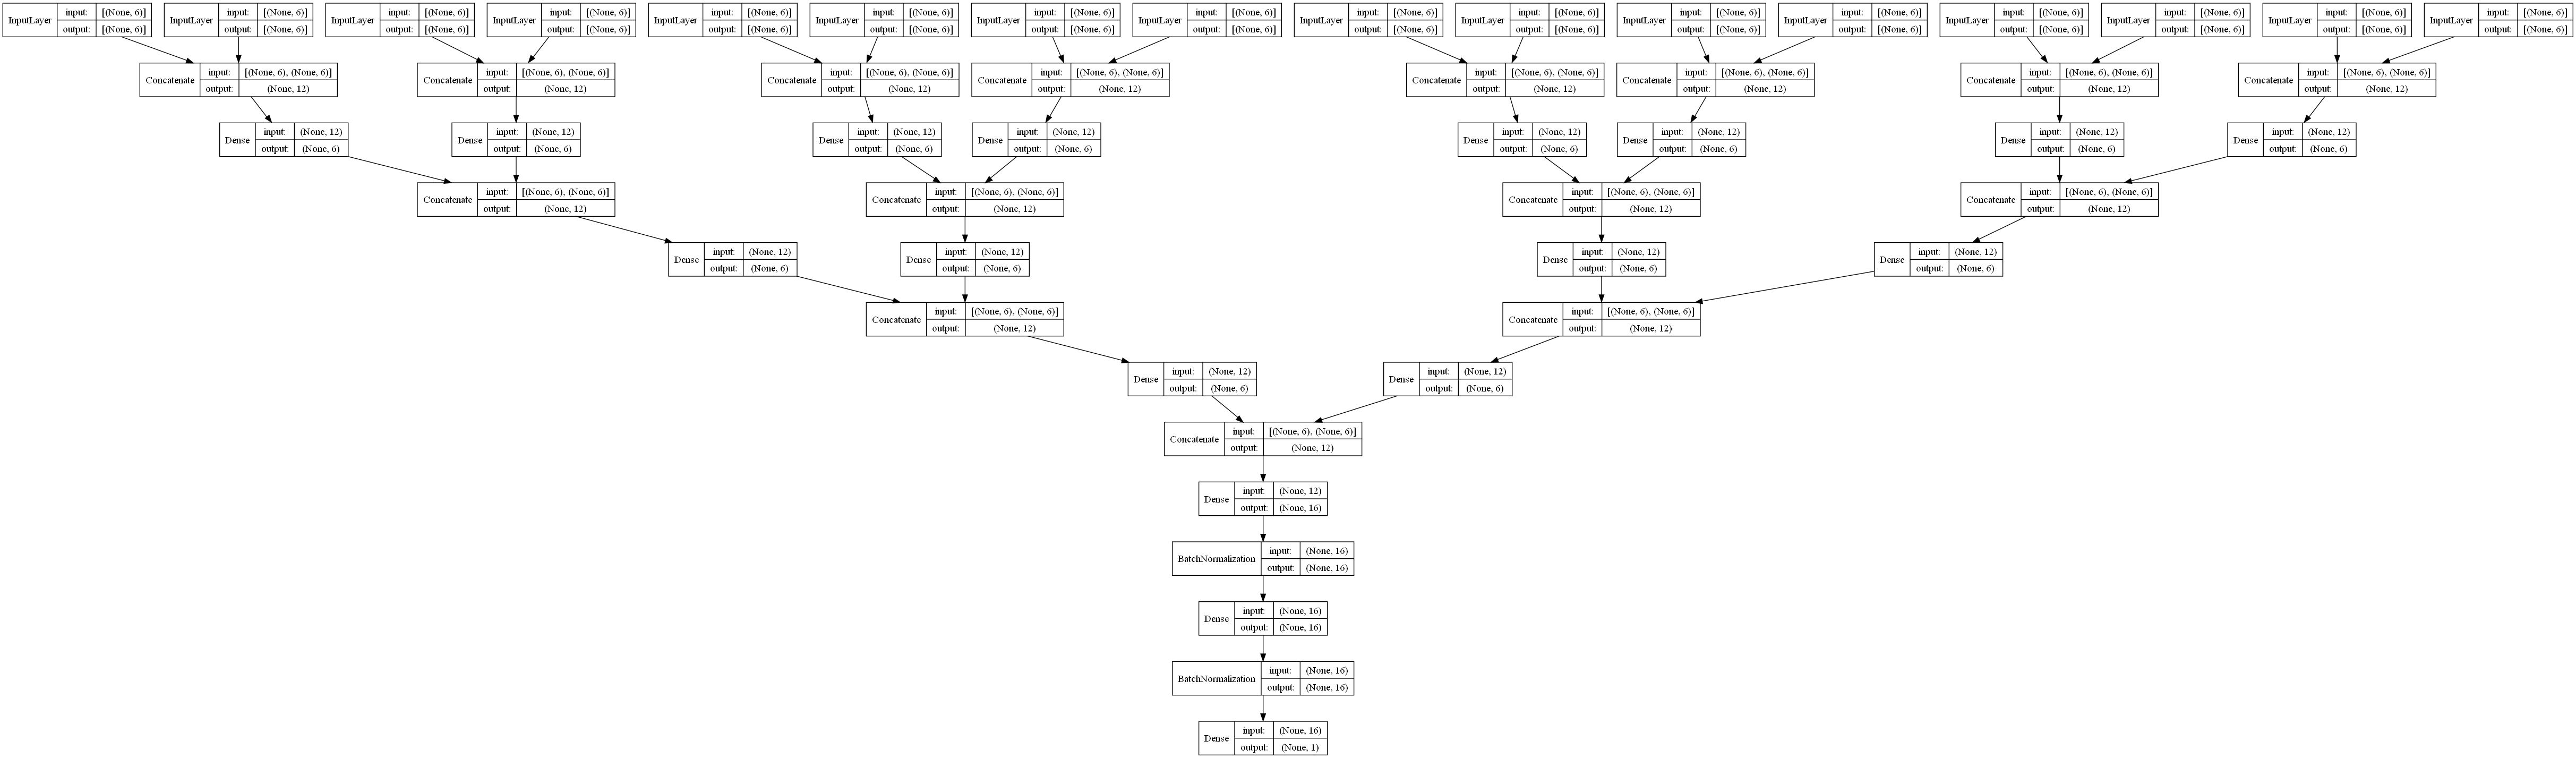

In [7]:
tf.keras.utils.plot_model(model, to_file=os.path.join("result", "model_PCEDNet.png"), show_layer_names=False,  show_shapes=True)

# compile  the model 

In [8]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

# Train

In [10]:
%%time
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=EPOCH,
         callbacks= [tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=int(EPOCH*2/10), min_lr=0.0000001)])

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.5046 - accuracy: 0.8130 - precision: 0.2750 - recall: 0.4316 - val_loss: 0.3271 - val_accuracy: 0.9283 - val_precision: 0.5885 - val_recall: 0.1852 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3405 - accuracy: 0.8860 - precision: 0.6092 - recall: 0.1917 - val_loss: 0.2119 - val_accuracy: 0.9271 - val_precision: 0.6599 - val_recall: 0.2357 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3172 - accuracy: 0.8933 - precision: 0.7252 - recall: 0.2115 - val_loss: 0.2198 - val_accuracy: 0.9436 - val_precision: 0.8425 - val_recall: 0.5542 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2868 - accuracy: 0.9041 - precision: 0.7533 - recall: 0.2420 - val_loss: 0.1809 - val_accuracy: 0.9581 - val_precision: 0.9607 - val_recall: 0.5398 - lr: 0.0010
Epoch 5/50
235/235 [============================

<Figure size 1000x500 with 0 Axes>

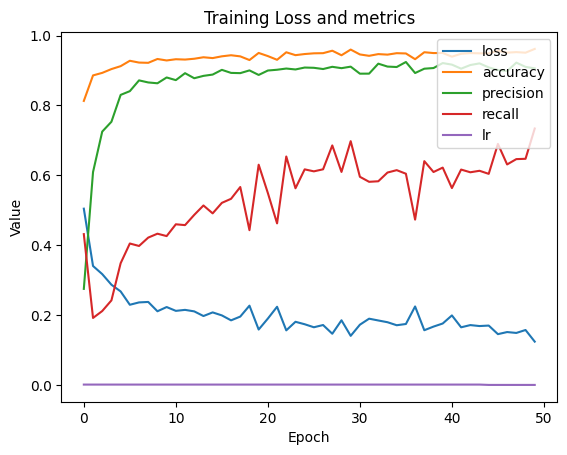

In [11]:
history_df = pd.DataFrame(hist.history)
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy', 'precision', 'recall', 'lr']].plot()
plt.title('Training Loss and metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.savefig(os.path.join("result", "model_PCEDNet_plot.png"))
plt.show()

# Evaluation

In [12]:
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ssm.npy")

In [13]:
%%time
e1 = Evaluation(model, datagen_test)
e1.predict()

Running on GPU


  0%|                                                                                           | 0/88 [00:00<?, ?it/s]

512/512 [==============================] - 2s 4ms/step


  1%|▉                                                                                  | 1/88 [00:02<03:46,  2.60s/it]

512/512 [==============================] - 2s 4ms/step


  2%|█▉                                                                                 | 2/88 [00:04<03:31,  2.46s/it]

512/512 [==============================] - 2s 4ms/step


  3%|██▊                                                                                | 3/88 [00:07<03:24,  2.40s/it]

512/512 [==============================] - 2s 4ms/step


  5%|███▊                                                                               | 4/88 [00:09<03:19,  2.38s/it]

512/512 [==============================] - 2s 4ms/step


  6%|████▋                                                                              | 5/88 [00:11<03:16,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


  7%|█████▋                                                                             | 6/88 [00:14<03:12,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


  8%|██████▌                                                                            | 7/88 [00:16<03:10,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


  9%|███████▌                                                                           | 8/88 [00:18<03:07,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 10%|████████▍                                                                          | 9/88 [00:21<03:04,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 11%|█████████▎                                                                        | 10/88 [00:23<03:02,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 12%|██████████▎                                                                       | 11/88 [00:26<03:00,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 14%|███████████▏                                                                      | 12/88 [00:28<02:58,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 15%|████████████                                                                      | 13/88 [00:30<02:56,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 16%|█████████████                                                                     | 14/88 [00:33<02:54,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 17%|█████████████▉                                                                    | 15/88 [00:35<02:52,  2.37s/it]

512/512 [==============================] - 2s 4ms/step


 18%|██████████████▉                                                                   | 16/88 [00:37<02:50,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 19%|███████████████▊                                                                  | 17/88 [00:40<02:48,  2.37s/it]

512/512 [==============================] - 2s 4ms/step


 20%|████████████████▊                                                                 | 18/88 [00:42<02:46,  2.38s/it]

512/512 [==============================] - 2s 4ms/step


 22%|█████████████████▋                                                                | 19/88 [00:44<02:43,  2.37s/it]

512/512 [==============================] - 2s 4ms/step


 23%|██████████████████▋                                                               | 20/88 [00:47<02:41,  2.37s/it]

512/512 [==============================] - 2s 4ms/step


 24%|███████████████████▌                                                              | 21/88 [00:49<02:38,  2.37s/it]

512/512 [==============================] - 2s 4ms/step


 25%|████████████████████▌                                                             | 22/88 [00:52<02:35,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 26%|█████████████████████▍                                                            | 23/88 [00:54<02:33,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 27%|██████████████████████▎                                                           | 24/88 [00:56<02:30,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 28%|███████████████████████▎                                                          | 25/88 [00:59<02:27,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 30%|████████████████████████▏                                                         | 26/88 [01:01<02:24,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 31%|█████████████████████████▏                                                        | 27/88 [01:03<02:22,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 32%|██████████████████████████                                                        | 28/88 [01:06<02:19,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 33%|███████████████████████████                                                       | 29/88 [01:08<02:17,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 34%|███████████████████████████▉                                                      | 30/88 [01:10<02:14,  2.32s/it]

512/512 [==============================] - 2s 4ms/step


 35%|████████████████████████████▉                                                     | 31/88 [01:12<02:12,  2.32s/it]

512/512 [==============================] - 2s 4ms/step


 36%|█████████████████████████████▊                                                    | 32/88 [01:15<02:11,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 38%|██████████████████████████████▊                                                   | 33/88 [01:17<02:08,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 39%|███████████████████████████████▋                                                  | 34/88 [01:20<02:06,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 40%|████████████████████████████████▌                                                 | 35/88 [01:22<02:03,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 41%|█████████████████████████████████▌                                                | 36/88 [01:24<02:00,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 42%|██████████████████████████████████▍                                               | 37/88 [01:26<01:58,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 43%|███████████████████████████████████▍                                              | 38/88 [01:29<01:56,  2.32s/it]

512/512 [==============================] - 2s 4ms/step


 44%|████████████████████████████████████▎                                             | 39/88 [01:31<01:53,  2.32s/it]

512/512 [==============================] - 2s 4ms/step


 45%|█████████████████████████████████████▎                                            | 40/88 [01:33<01:51,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 47%|██████████████████████████████████████▏                                           | 41/88 [01:36<01:49,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 48%|███████████████████████████████████████▏                                          | 42/88 [01:38<01:48,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 49%|████████████████████████████████████████                                          | 43/88 [01:40<01:43,  2.31s/it]

512/512 [==============================] - 2s 3ms/step


 50%|█████████████████████████████████████████                                         | 44/88 [01:42<01:37,  2.22s/it]

512/512 [==============================] - 2s 4ms/step


 51%|█████████████████████████████████████████▉                                        | 45/88 [01:45<01:34,  2.19s/it]

512/512 [==============================] - 2s 4ms/step


 52%|██████████████████████████████████████████▊                                       | 46/88 [01:47<01:33,  2.23s/it]

512/512 [==============================] - 2s 4ms/step


 53%|███████████████████████████████████████████▊                                      | 47/88 [01:49<01:33,  2.29s/it]

512/512 [==============================] - 2s 4ms/step


 55%|████████████████████████████████████████████▋                                     | 48/88 [01:52<01:31,  2.30s/it]

512/512 [==============================] - 2s 4ms/step


 56%|█████████████████████████████████████████████▋                                    | 49/88 [01:54<01:31,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 57%|██████████████████████████████████████████████▌                                   | 50/88 [01:57<01:30,  2.38s/it]

512/512 [==============================] - 2s 4ms/step


 58%|███████████████████████████████████████████████▌                                  | 51/88 [01:59<01:27,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 59%|████████████████████████████████████████████████▍                                 | 52/88 [02:01<01:25,  2.38s/it]

512/512 [==============================] - 2s 4ms/step


 60%|█████████████████████████████████████████████████▍                                | 53/88 [02:04<01:22,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 61%|██████████████████████████████████████████████████▎                               | 54/88 [02:06<01:19,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 62%|███████████████████████████████████████████████████▎                              | 55/88 [02:08<01:17,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 64%|████████████████████████████████████████████████████▏                             | 56/88 [02:11<01:15,  2.36s/it]

512/512 [==============================] - 2s 5ms/step


 65%|█████████████████████████████████████████████████████                             | 57/88 [02:13<01:15,  2.45s/it]

512/512 [==============================] - 2s 4ms/step


 66%|██████████████████████████████████████████████████████                            | 58/88 [02:15<01:10,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 67%|██████████████████████████████████████████████████████▉                           | 59/88 [02:18<01:08,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 68%|███████████████████████████████████████████████████████▉                          | 60/88 [02:20<01:04,  2.31s/it]

512/512 [==============================] - 2s 4ms/step


 69%|████████████████████████████████████████████████████████▊                         | 61/88 [02:22<01:00,  2.25s/it]

512/512 [==============================] - 2s 4ms/step


 70%|█████████████████████████████████████████████████████████▊                        | 62/88 [02:24<00:58,  2.26s/it]

512/512 [==============================] - 2s 4ms/step


 72%|██████████████████████████████████████████████████████████▋                       | 63/88 [02:27<00:56,  2.28s/it]

512/512 [==============================] - 2s 4ms/step


 73%|███████████████████████████████████████████████████████████▋                      | 64/88 [02:29<00:54,  2.29s/it]

512/512 [==============================] - 2s 4ms/step


 74%|████████████████████████████████████████████████████████████▌                     | 65/88 [02:31<00:52,  2.30s/it]

512/512 [==============================] - 2s 4ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 66/88 [02:34<00:50,  2.32s/it]

512/512 [==============================] - 2s 4ms/step


 76%|██████████████████████████████████████████████████████████████▍                   | 67/88 [02:36<00:48,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 77%|███████████████████████████████████████████████████████████████▎                  | 68/88 [02:38<00:46,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 78%|████████████████████████████████████████████████████████████████▎                 | 69/88 [02:41<00:44,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 80%|█████████████████████████████████████████████████████████████████▏                | 70/88 [02:43<00:41,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 81%|██████████████████████████████████████████████████████████████████▏               | 71/88 [02:45<00:39,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 82%|███████████████████████████████████████████████████████████████████               | 72/88 [02:48<00:37,  2.33s/it]

512/512 [==============================] - 2s 4ms/step


 83%|████████████████████████████████████████████████████████████████████              | 73/88 [02:50<00:35,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 84%|████████████████████████████████████████████████████████████████████▉             | 74/88 [02:52<00:32,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 85%|█████████████████████████████████████████████████████████████████████▉            | 75/88 [02:55<00:30,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 86%|██████████████████████████████████████████████████████████████████████▊           | 76/88 [02:57<00:28,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 88%|███████████████████████████████████████████████████████████████████████▊          | 77/88 [02:59<00:25,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 89%|████████████████████████████████████████████████████████████████████████▋         | 78/88 [03:02<00:23,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 90%|█████████████████████████████████████████████████████████████████████████▌        | 79/88 [03:04<00:21,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 91%|██████████████████████████████████████████████████████████████████████████▌       | 80/88 [03:07<00:18,  2.36s/it]

512/512 [==============================] - 2s 4ms/step


 92%|███████████████████████████████████████████████████████████████████████████▍      | 81/88 [03:09<00:16,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 93%|████████████████████████████████████████████████████████████████████████████▍     | 82/88 [03:11<00:14,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 83/88 [03:14<00:11,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 84/88 [03:16<00:09,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 85/88 [03:18<00:07,  2.35s/it]

512/512 [==============================] - 2s 4ms/step


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 86/88 [03:21<00:04,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████ | 87/88 [03:23<00:02,  2.34s/it]

512/512 [==============================] - 2s 4ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 88/88 [03:25<00:00,  2.34s/it]


CPU times: total: 4min 40s
Wall time: 3min 29s


In [14]:
e1.eval_()

,precision,recall,MCC,F1,accuracy,IoU
0,0.8285,0.760096,0.770628,0.792825,0.95839,0.656761


In [15]:
e1.eval_().to_json(os.path.join("result","metrique_PCEDNet.json"))

In [16]:
model.save(os.path.join(MODEL_PATH))

INFO:tensorflow:Assets written to: Model\PCEDNET\assets
